In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
trainDf=pd.read_csv("titanic_train.csv")
testDf=pd.read_csv("titanic_test.csv")
trainDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
testDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
trainDf.shape, testDf.shape

((891, 12), (418, 11))

In [5]:
train_ratio=trainDf.shape[0]/(trainDf.shape[0]+testDf.shape[0])
print("Train Ratio: ",round(train_ratio,2),"%")
test_ratio=testDf.shape[0]/(trainDf.shape[0]+testDf.shape[0])
print("Test Ratio: ",round(test_ratio,2),"%")

Train Ratio:  0.68 %
Test Ratio:  0.32 %


In [6]:
trainDf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
trainDf['Age']=trainDf['Age'].fillna(trainDf['Age'].median())
trainDf['Embarked']=trainDf['Embarked'].fillna(trainDf['Embarked'].mode()[0])
testDf['Age']=testDf['Age'].fillna(testDf['Age'].median())
testDf['Fare']=testDf['Fare'].fillna(testDf['Fare'].median())
trainDf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
trainDf['Cabin']=trainDf['Cabin'].fillna('Unknown')
testDf['Cabin']=testDf['Cabin'].fillna('Unknown')

In [9]:
testDf.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
trainDf.duplicated().sum() , testDf.duplicated().sum()

(np.int64(0), np.int64(0))

In [11]:
trainDf.info(), testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [12]:
trainDf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
testDf.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
categorics=[cat for cat in trainDf.columns if trainDf[cat].dtype=='object']
numerics=[num for num in trainDf.columns if trainDf[num].dtype!='object']

In [15]:
for col in trainDf.columns:
    print(f"{col}: {trainDf[col].nunique()} unique values")

PassengerId: 891 unique values
Survived: 2 unique values
Pclass: 3 unique values
Name: 891 unique values
Sex: 2 unique values
Age: 88 unique values
SibSp: 7 unique values
Parch: 7 unique values
Ticket: 681 unique values
Fare: 248 unique values
Cabin: 148 unique values
Embarked: 3 unique values


In [16]:
unique_list=["Pclass","Sex","SibSp","Parch","Embarked"]

for col in unique_list:
    print(f"{col} unique values: {trainDf[col].unique()}")

Pclass unique values: [3 1 2]
Sex unique values: ['male' 'female']
SibSp unique values: [1 0 3 4 2 5 8]
Parch unique values: [0 1 2 5 3 4 6]
Embarked unique values: ['S' 'C' 'Q']


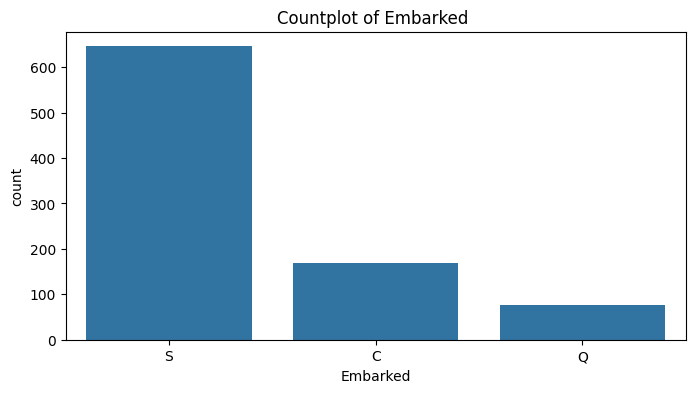

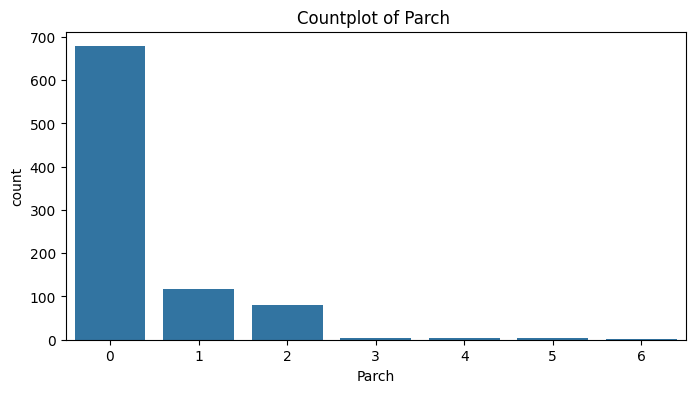

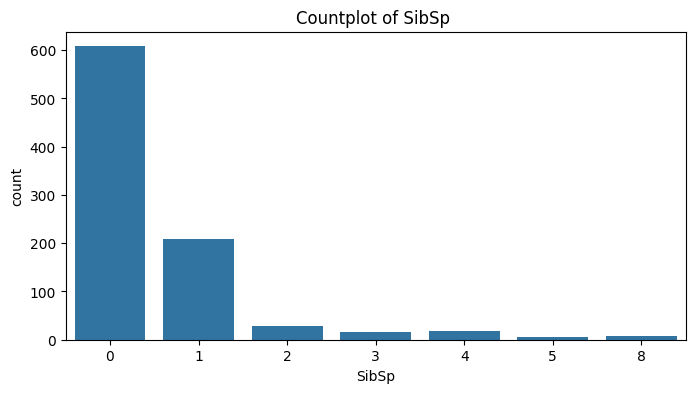

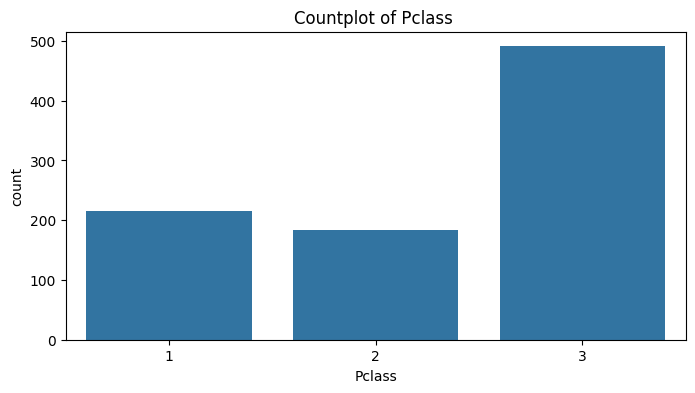

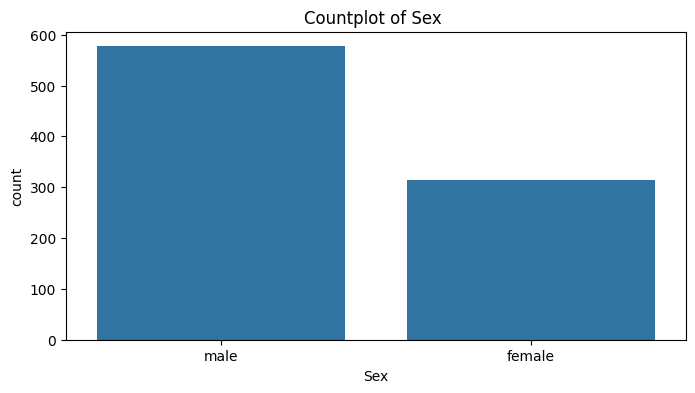

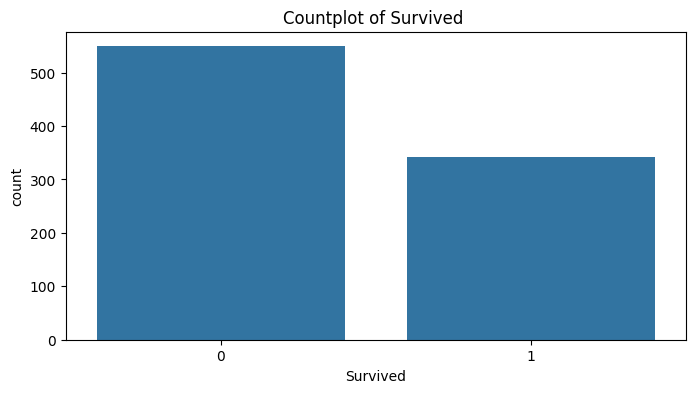

In [43]:
cols_to_graph=['Embarked','Parch','SibSp','Pclass','Sex','Survived']
for i in range(0,6):
    plt.figure(figsize=(8,4))
    sns.countplot(x=cols_to_graph[i],data=trainDf)
    plt.title(f"Countplot of {cols_to_graph[i]} ")
    plt.show()

In [48]:
survived_sex=trainDf.groupby(['Sex','Survived'])['Survived'].count().unstack()
female_survived=survived_sex.loc['female',1]/len(trainDf)
female_not_survived=1-female_survived

male_survived=survived_sex.loc['male',1]/len(trainDf)
male_not_survived=1-male_survived
print("Female Survival Rate: ",round(female_survived*100,2),"%")
print("Female Not Survival Rate: ",round(female_not_survived*100,2),"%")
print("Male Survival Rate: ",round(male_survived*100,2),"%")
print("Male Not Survival Rate: ",round(male_not_survived*100,2),"%")


Female Survival Rate:  26.15 %
Female Not Survival Rate:  73.85 %
Male Survival Rate:  12.23 %
Male Not Survival Rate:  87.77 %


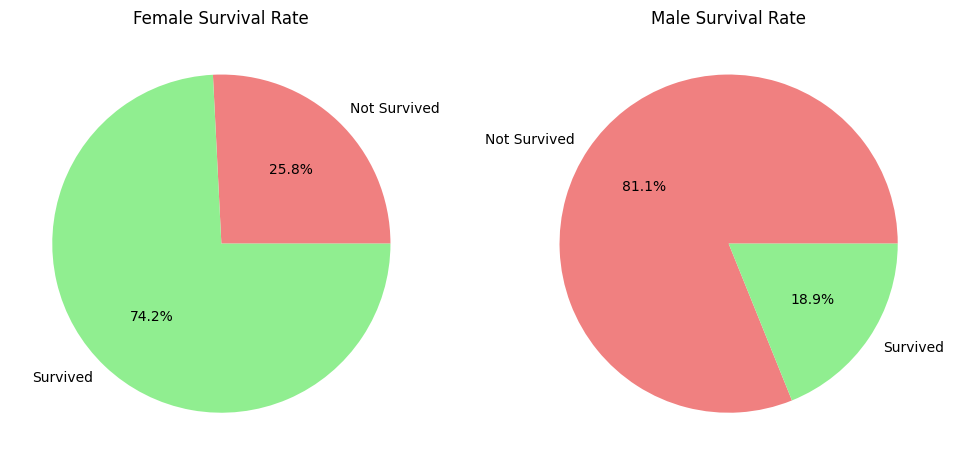

In [ ]:
female_counts = survived_sex.loc['female'] 
male_counts = survived_sex.loc['male']

fig, axes = plt.subplots(1,2, figsize=(12,6))

axes[0].pie(female_counts, labels=['Not Survived','Survived'], autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
axes[0].set_title("Female Survival Rate")

axes[1].pie(male_counts, labels=['Not Survived','Survived'], autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
axes[1].set_title("Male Survival Rate")

plt.show()


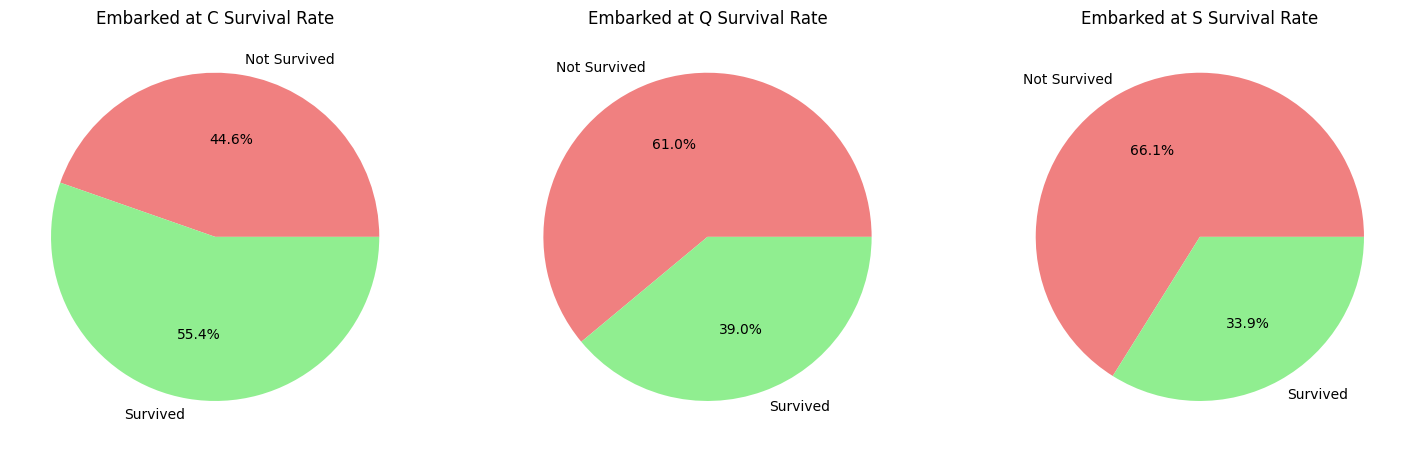

In [ ]:
embarked_survived=trainDf.groupby(['Embarked','Survived'])['Survived'].count().unstack()
c_counts=embarked_survived.loc['C']
q_counts=embarked_survived.loc['Q']
s_counts=embarked_survived.loc['S']

fig, axes=plt.subplots(1,3, figsize=(18,6))
axes[0].pie(c_counts, labels=['Not Survived','Survived'], autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
axes[0].set_title("Embarked at C Survival Rate")
axes[1].pie(q_counts, labels=['Not Survived','Survived'], autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
axes[1].set_title("Embarked at Q Survival Rate")
axes[2].pie(s_counts, labels=['Not Survived','Survived'], autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
axes[2].set_title("Embarked at S Survival Rate")
plt.show()

In [17]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,RobustScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve


In [18]:
X_train=trainDf.drop(columns=['Survived','PassengerId','Name','Ticket','Cabin'],axis=1)
y_train=trainDf['Survived']
X_test=testDf.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)


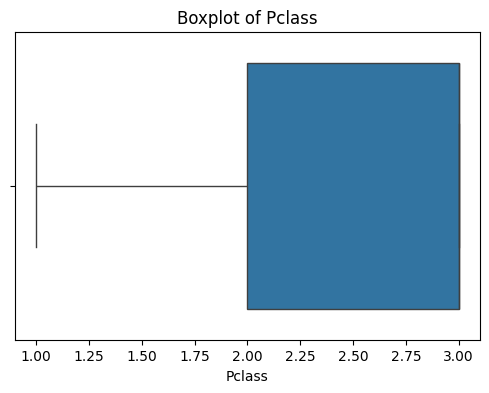

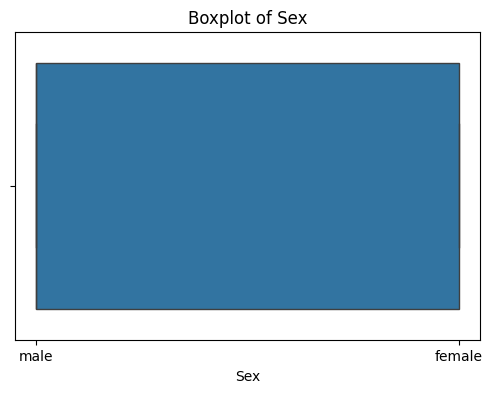

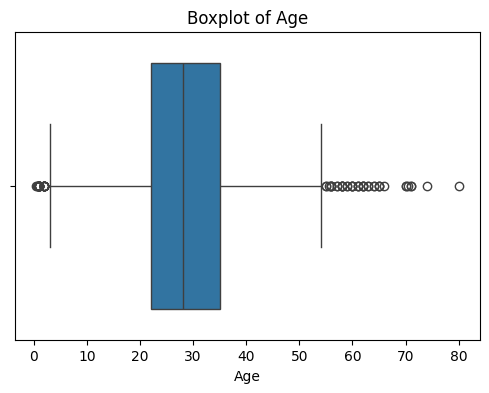

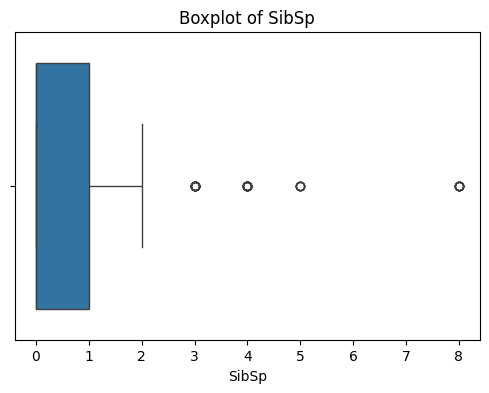

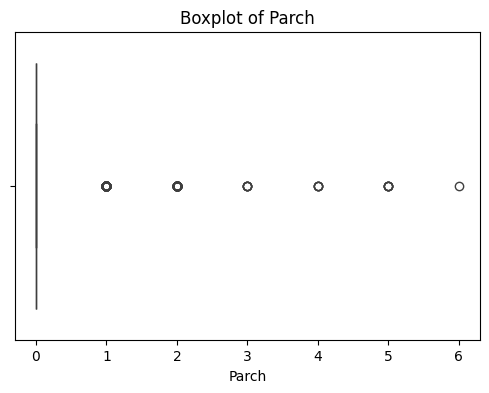

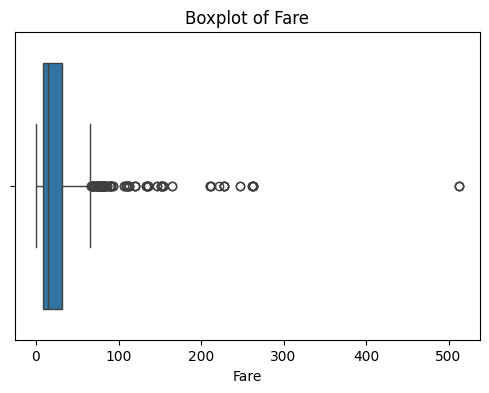

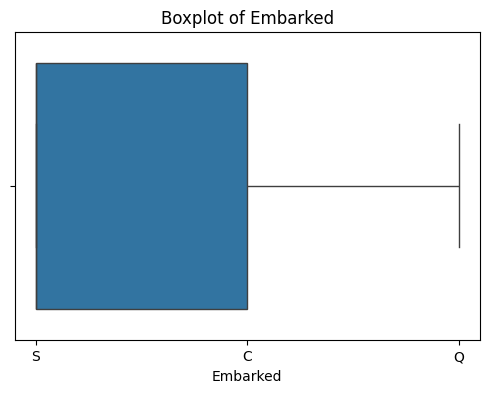

In [19]:
for col in X_train.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [20]:
preprocessor=ColumnTransformer(transformers=[
 
 ('oridnal',OrdinalEncoder(categories=[['Q', 'S', 'C']]),['Embarked']),
 ('one',OneHotEncoder(drop='first',handle_unknown="ignore"),['Sex']),
 ('num',RobustScaler(),['Fare','Age'])
],remainder='passthrough')

X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [21]:
col_names=preprocessor.get_feature_names_out()
pd.DataFrame(X_train,columns=col_names).head()

,oridnal__Embarked,one__Sex_male,num__Fare,num__Age,remainder__Pclass,remainder__SibSp,remainder__Parch
0,1.0,1.0,-0.312011,-0.461538,3.0,1.0,0.0
1,2.0,0.0,2.461242,0.769231,1.0,1.0,0.0
2,1.0,0.0,-0.282777,-0.153846,3.0,0.0,0.0
3,1.0,0.0,1.673732,0.538462,1.0,1.0,0.0
4,1.0,1.0,-0.277363,0.538462,3.0,0.0,0.0


In [22]:
pd.DataFrame(X_test,columns=col_names).head()

,oridnal__Embarked,one__Sex_male,num__Fare,num__Age,remainder__Pclass,remainder__SibSp,remainder__Parch
0,0.0,1.0,-0.286926,0.500000,3.0,0.0,0.0
1,1.0,0.0,-0.322838,1.461538,3.0,1.0,0.0
2,0.0,1.0,-0.206444,2.615385,2.0,0.0,0.0
3,1.0,1.0,-0.250836,-0.076923,3.0,0.0,0.0
4,1.0,0.0,-0.093839,-0.461538,3.0,1.0,1.0


In [53]:
rfc=RandomForestClassifier(random_state=21)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)


In [24]:
submission=pd.DataFrame({
    "PassengerId":testDf['PassengerId'],
    "Survived":y_pred
})

submission.to_csv("titanic_submission.csv",index=False)